# Project - Adaptive Attack Metadata Classifier using Log Analysis Feedback Loop
Dave Loper
University of North Dakota
Rajesh Godasu - Professor
December 2023

## Objectives
The goal of this project was to fast-classify activity ahead of log file detection and provide pre-emptive blocking of brute force, malicious attacks from nefarious sources, specifically targeting defense against botnets. Botnets are distributed, scalable platforms used by hackers. Botnets largely consist of compromised computers that perform the tasks that the attacker wishes. These networks often are used in a coordinated attack to brute force authentication credentials. Some defensive mechanisms are less useful against these botnets because of their distributed nature.

I will attempt to classify the applications used by hackers through metadata exposed during the initial phases of connectivity. Next, create record the initial phases of connection exchanges, both good and bad to collect the metadata. Then, sort this metadata using machine learning tools to classify the software used by the hackers. Using Fail2ban’s update paradigm for blocking IPs for defense, I will create a model that will aid in identifying software used by the botnet attackers.
The general idea is that the information gleaned from the metadata may expose commonality in the application being used even if the attacker is distributing the attack in a botnet. 

I will use a logfile classifier to create an ongoing, adjustable model for the metadata. Most log-based classifiers use post-failure action to ban the IP address implicated in the attack. This is a reactive approach and can only block the prior perpetrator. The usage of a botnet allows hackers to distribute the attack giving the attacker inexhaustible attempts across many IP addresses. This, however, creates a weakness that our defense will exploit. Namely, the distribution of the software and coordination by the botnet means that the software used in the attack carries a "sameness" that we aim to detect. The traditional defense can then be used in a "defense in depth" strategy and serve to provide a feedback loop for continual training. 

The significance of this research is to create a novel defense against botnets by exploiting the distributed nature of these systems against itself. Since distribution has been used by attackers to overcome the reactive nature of defensive logfile systems, we will use the scale of the system against itself. The bigger the botnet, the harder they fall (and fail.)
I will use an existing, common tool, named Fail2ban, to detect certain types of brute-force hacking attempts based on repeated failures to authenticate thus preventing sustained brute force attacks against certain protocols from a specific IP. It does this through logfile analysis. Our project goal will be to use the Fail2ban (also "fail2ban") classifier as a useful training model for feature selection on traffic in earlier phases of network exchange. This will address some weaknesses with Fail2ban and provide a method for early detection of botnet adaptations, new hacker tooling, distributions, and vectors.


## Requirements
The steps of the project are:
1. Prep data for feature selection
    1. Convert PCAP data to spreadsheet/db form
    2. Validate that we have classifications in training data
2. Import necessary libraries required to perform your supervised Machine Learning task including preprocessing, visualizations, and evaluation.
3. Load data into program
4. Resample the  dataset to balance between Hack and Clean transactions
5.	Perform KNN classification to classify Real/Hack(use k=5)
6.	Perform Naïve bayes to classify Real/Hack
7.	Perform Decision Trees to classify Real/Hack
8.	Plot the confusion matrices containing results with appropriate visualization.
9.	Compare the accuracies of three classifiers.


# 1 - Prep Data

https://paperswithcode.com/datasets?q=ssh&v=lst&o=match

## CICIDS2017 Dataset
Training data was sourced from https://www.unb.ca/cic/datasets/ids-2017.html

This dataset includes a business week's worth of data including packet capture (PCAP) data for this week.
* Monday-WorkingHours.pcap
* Tuesday-WorkingHours.pcap
* Wednesday-WorkingHours.pcap
* Thursday-WorkingHours.pcap
* Friday-WorkingHours.pcap

The labelling data gives us greater insight about the dataset through the label documents. The utility of each is noted:
* Monday-WorkingHours.pcap_ISCX.csv
 *  This file shows us that there is only 'BENIGN' labelling. This is not useful unless we also have ATTACK data.
* Tuesday-WorkingHours.pcap_ISCX.csv
*   This file shows us 'BENIGN' labelling and 'SSH-Patator'. This is useful.
*  * *This data will work for our purposes**
   *  There are 8033 records to work with in this data set. 5898 contain the malicious attacks.
* Wednesday-WorkingHours.pcap_ISCX.csv
 *  Wednesday only has BENIGN SSH traffic. Not useful.
* Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
 *  Thursday Morning only has BENIGN SSH traffic. Not useful.
* Thursday-WorkingHours.-Afternoon-Infiltration.pcap_ISCX.csv
 *  Thursday Afternoon only has BENIGN SSH traffic. Not useful.
* Friday-WorkingHours-Morning.pcap_ISCX.csv
 *  Friday Morning only has BENIGN SSH traffic. Not useful.
* Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
 *  This data contains portscans
 * * *This data will work for our purposes**
   *  916 entries that are benign and portscans
* Friday-WorkingHours-DDos.pcap_ISCX.csv
 *  Thursday Afternoon only has BENIGN SSH traffic. Not useful.

## UQ NIDS Datasets
https://staff.itee.uq.edu.au/marius/NIDS_datasets/

10. NF-UQ-NIDS-v2
https://rdm.uq.edu.au/files/e2412450-ef9c-11ed-827d-e762de186848
e3bd3035f88e55fa_MOHANAD_A4706
* Dataset too small

5. NF-UQ-NIDS
https://rdm.uq.edu.au/files/76b6edf0-ef9c-11ed-b5f6-b1a04f482c13

**This is a good dataset. We will use this.**

NF-UQ-NIDS-v2


## Other data not considered
UQ NetFlow NIDS v1

MQTT-IoT-IDS2020




# 2 - Import libraries
We will import the libraries first so that we have them all, the relevance of each library is listed in the comments of the code with URLs for documentation and support purposes.

In [1]:
##################################
# Basic libraries                #
##################################
import pandas as pd              # Pandas support https://pandas.pydata.org/
import numpy as np               # NumPy support  https://numpy.org/
import math                      # Math library   https://docs.python.org/3/library/math.html
##################################

##################################
# Visualization                  #
##################################
import matplotlib.pyplot as plt  # matplotlib     https://matplotlib.org/
import seaborn as sns            # seaborn        https://seaborn.pydata.org/
##################################

######################################################################
# SKLearn        scikit-learn   https://scikit-learn.org/stable/     #
######################################################################
from sklearn.model_selection import train_test_split                 # Needed for training
from sklearn.preprocessing import StandardScaler                     # Needed for scaling our data
from sklearn.preprocessing import RobustScaler                       # We're going to need a bigger boat
from sklearn.neighbors import KNeighborsClassifier                   # Needed for KNN and confusion matrices
from sklearn.metrics import classification_report, confusion_matrix  # Needed for classification and confusion matrix
from sklearn.metrics import f1_score                                 # Needed for scoring
from sklearn.metrics import accuracy_score                           # Needed for scoring
from sklearn.naive_bayes import GaussianNB                           # Needed for bayesian classification
from sklearn.tree import DecisionTreeClassifier                      # Needed for decision tree
from sklearn.linear_model import LinearRegression                    # Needed for linear regression
from sklearn.model_selection import learning_curve                   # Needed for learning curve visuals
from sklearn.svm import SVC                                          # Needed for vector machine classifier viz
from sklearn.ensemble import RandomForestClassifier                  # Needed for random forest classifier visuals
from sklearn.linear_model import LogisticRegression                  # Needed for logistic regression class viz
from sklearn.metrics import roc_curve, roc_auc_score, auc            # Needed for ROC curve visualizations
######################################################################


## Import of the data

The data is in the format of:
* Destination Port
* Flow Duration
* Total Fwd Packets
* Total Backward Packets	
* Total Length of Fwd Packets
* Total Length of Bwd Packets
* Fwd Packet Length Max
* Fwd Packet Length Min
* Fwd Packet Length Mean
* Fwd Packet Length Std	Bwd Packet Length Max
* Bwd Packet Length Min*Bwd Packet Length Mean
* Bwd Packet Length Std	Flow Bytes/s
* Flow Packets/s
* Flow IAT Mean
* Flow IAT Std
* Flow IAT Max
* Flow IAT Min	Fwd IAT Total
* Fwd IAT Mean*Fwd IAT Std
* Fwd IAT Max*Fwd IAT Min	Bwd IAT Total
* Bwd IAT Mean
* Bwd IAT Std
* Bwd IAT Max
* Bwd IAT Min	Fwd PSH Flags
* Bwd PSH Flags
* Fwd URG Flags
* Bwd URG Flags
* Fwd Header Length
* Bwd Header Length
* Fwd Packets/s
* Bwd Packets/s
* Min Packet Length
* Max Packet Length
* Packet Length Mean
* Packet Length Std
* Packet Length Variance
* FIN Flag Count
* SYN Flag Count
* RST Flag Count
* PSH Flag Count
* ACK Flag Count
* URG Flag Count
* CWE Flag Count
* ECE Flag Count
* Down/Up Ratio
* Average Packet Size
* Avg Fwd Segment Size
* Avg Bwd Segment Size
* Fwd Header Length	
* Fwd Avg Bytes/Bulk
* Fwd Avg Packets/Bulk
* Fwd Avg Bulk Rate
* Bwd Avg Bytes/Bulk
* Bwd Avg Packets/Bulk	
* Bwd Avg Bulk Rate	
* Subflow Fwd Packets
* Subflow Fwd Bytes
* Subflow Bwd Packets
* Subflow Bwd Bytes	
* Init_Win_bytes_forward
* Init_Win_bytes_backward
* act_data_pkt_fwd
* min_seg_size_forward
* Active Mean
* Active Std
* Active Max
* Active Min
* Idle Mean
* Idle Std
* Idle Max
* Idle Min
* Label

In [2]:
#################################################
# load our card_transdata dataset               #
#################################################
csv_file = 'Tuesday-WorkingHours.pcap_ISCX.csv'                 # Set our file variable
data = pd.read_csv(csv_file)                    # Load the CSV file into a pandas DataFrame
data[' Label'] = data[' Label'].replace({"FTP-Patator": 1, "SSH-Patator": 1, "BENIGN": 0})
print('The length of our data is: ', len(data)) # Show our dataset length
data.head()                                     # Display the first 5 rows of the DataFrame
#################################################


The length of our data is:  445909


Destination Port   Flow Duration   Total Fwd Packets  \
0                 88             640                   7   
1                 88             900                   9   
2                 88            1205                   7   
3                 88             511                   7   
4                 88             773                   9   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        4                          440   
1                        4                          600   
2                        4                         2776   
3                        4                          452   
4                        4                          612   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                           358                     220   
1                          2944                     300   
2                          2830                    1388   
3                           370                     226   
4                          2944                     306   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0                62.857143              107.349008   
1                       0                66.666667              132.287566   
2                       0               396.571429              677.274651   
3                       0                64.571429              110.276708   
4                       0                68.000000              134.933317   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     20          0.0          0.0            0   
1  ...                     20          0.0          0.0            0   
2  ...                     20          0.0          0.0            0   
3  ...                     20          0.0          0.0            0   
4  ...                     20          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0       0  
1            0        0.0        0.0          0          0       0  
2            0        0.0        0.0          0          0       0  
3            0        0.0        0.0          0          0       0  
4            0        0.0        0.0          0          0       0  

[5 rows x 79 columns]

In [3]:

# Function to identify non-numeric rows
def find_non_numeric_rows(df):
    # Check if each cell is a number (excluding the first row)
    is_number_mask = df.iloc[1:].applymap(lambda x: isinstance(x, (int, float)))
    
    # Identify rows with any non-numeric values
    non_numeric_rows = df.iloc[1:][~is_number_mask.all(axis=1)]
    
    return non_numeric_rows

# Applying the function to 'data'
non_numeric_rows = find_non_numeric_rows(data)

# Display the rows with non-numeric values
non_numeric_rows
#data.head()                                     # Display the first 5 rows of the DataFrame


Empty DataFrame
Columns: [ Destination Port,  Flow Duration,  Total Fwd Packets,  Total Backward Packets, Total Length of Fwd Packets,  Total Length of Bwd Packets,  Fwd Packet Length Max,  Fwd Packet Length Min,  Fwd Packet Length Mean,  Fwd Packet Length Std, Bwd Packet Length Max,  Bwd Packet Length Min,  Bwd Packet Length Mean,  Bwd Packet Length Std, Flow Bytes/s,  Flow Packets/s,  Flow IAT Mean,  Flow IAT Std,  Flow IAT Max,  Flow IAT Min, Fwd IAT Total,  Fwd IAT Mean,  Fwd IAT Std,  Fwd IAT Max,  Fwd IAT Min, Bwd IAT Total,  Bwd IAT Mean,  Bwd IAT Std,  Bwd IAT Max,  Bwd IAT Min, Fwd PSH Flags,  Bwd PSH Flags,  Fwd URG Flags,  Bwd URG Flags,  Fwd Header Length,  Bwd Header Length, Fwd Packets/s,  Bwd Packets/s,  Min Packet Length,  Max Packet Length,  Packet Length Mean,  Packet Length Std,  Packet Length Variance, FIN Flag Count,  SYN Flag Count,  RST Flag Count,  PSH Flag Count,  ACK Flag Count,  URG Flag Count,  CWE Flag Count,  ECE Flag Count,  Down/Up Ratio,  Average Packet Size,  Avg Fwd Segment Size,  Avg Bwd Segment Size,  Fwd Header Length.1, Fwd Avg Bytes/Bulk,  Fwd Avg Packets/Bulk,  Fwd Avg Bulk Rate,  Bwd Avg Bytes/Bulk,  Bwd Avg Packets/Bulk, Bwd Avg Bulk Rate, Subflow Fwd Packets,  Subflow Fwd Bytes,  Subflow Bwd Packets,  Subflow Bwd Bytes, Init_Win_bytes_forward,  Init_Win_bytes_backward,  act_data_pkt_fwd,  min_seg_size_forward, Active Mean,  Active Std,  Active Max,  Active Min, Idle Mean,  Idle Std,  Idle Max,  Idle Min,  Label]
Index: []

[0 rows x 79 columns]

## Clean up data
Make sure our data is clean

In [4]:
# Drop unneeded data

# Keep rows where 'Destination Port' is 22
data = data[data[' Destination Port'] = 22]

# Drop the 'Destination Port' column
data.drop(columns=[' Destination Port'], inplace=True)

# Display the modified DataFrame
print("\nModified DataFrame:")
data.head()

#######################################################################################
# Cleanup the data                                                                    #
#######################################################################################

# Function to check if a value is a number (integer or float)
def is_number(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Apply the function to each cell in the dataframe, except the first row
is_number_mask = data.iloc[1:].applymap(is_number)

# Drop rows where any cell is not a number, except the first row
data_cleaned = pd.concat([data.iloc[:1], data.iloc[1:][is_number_mask.all(axis=1)]])
data = data_cleaned

print('The length of our data is: ', len(data)) # Show our dataset length
data.head()                                     # Display the first 5 rows of the DataFrame

# Create an independent, testing DataFrame ========================================== #
df = pd.DataFrame(data)                                                               #
# Check for null values ============================================================= #
null_values = df.isnull().sum()                                                       #
total_values = df.count()                                                             #
null_report = pd.DataFrame({'Total Values': total_values, 'Null Values': null_values})#
# Remove columns with blank (null) data ============================================= #
columns_with_nulls = null_values[null_values > 0].index                               #
df_cleaned = df.drop(columns=columns_with_nulls)                                      #
null_report, df_cleaned                                                               #
#######################################################################################

data = df_cleaned



Modified DataFrame:
The length of our data is:  437876


## Resample the data (Step 3)
We need to resample the original dataset with 87,403 data points for both Real and Fraud classes.

Dataset contains imbalance in Real and Fraud classes. We will use the following binary to classify data for training using the fraud column:

* Real (class 0.0) meaning non-fraudulent transactions
* Fraud (class 1.0) meaning fraudulent transactions

In [ ]:
print(data.columns)

In [5]:
####################################################
# Resampling the data                              #
####################################################
fraud_data = data[data[' Label'] == 1] # SSH-Patator in our data means malware
real_data = data[data[' Label'] == 0]       # BENIGN in our LABEL column means it is ok
####################################################

# Count the number of samples in each class
fraud_count = len(fraud_data)
real_count = len(real_data)

# Determine the target number of samples for even distribution
target_count = min(fraud_count, real_count)

# Resample the fraud and real datasets
fraud_resampled = fraud_data.sample(n=target_count, replace=True, random_state=1)  # Upsample to match target_count
real_resampled = real_data.sample(n=target_count, replace=False, random_state=1)  # Downsample to match target_count

############################################################################
# Resample the real and fraud datasets to each have 87,403 data points     #
# If the class has less than 87,403 data points, perform upsampling        #
# If the class has more, perform downsampling                              #
############################################################################
#fraud_resampled = fraud_data.sample(n=445908, replace=True, random_state=1) # Set replace to True if you need to upsample
#real_resampled = real_data.sample(n=445908, replace=False, random_state=1)  # Set replace to False if no need to upsample
############################################################################

#######################################################################################
# Fixup the data by puting it back together, remove bias in sorting, and write out    #
#######################################################################################
resampled_data = pd.concat([fraud_resampled, real_resampled])                         # Combine the resampled dataframes
resampled_data = resampled_data.sample(frac=1, random_state=1).reset_index(drop=True) # Shuffle the dataset to remove bias
resampled_data = resampled_data.dropna() # Remove rows with NaN values
resampled_data = resampled_data.replace([np.inf, -np.inf], np.nan).dropna() # Replace infinity with NaN and then drop those rows
resampled_data = resampled_data[~resampled_data.applymap(lambda x: x == 'infinity').any(axis=1)] # Remove rows containing the string 'infinity'






print('Our original data length: ', len(data) )                                       # Show dataset length for original
print('Our modified data length: ', len(resampled_data))                              # Show length for changed
#######################################################################################

Our original data length:  437876
Our modified data length:  15865


## KNN Classification
Next, I perform a KNN classification to classify Real/Fraud using the five nearest neighbors (k=5).

In [6]:
##########################################################################################
# Train the data with KNN Classifier. Use 5 nearest neighbors and split data             #
##########################################################################################
knn = KNeighborsClassifier(n_neighbors=5)                                                # Initialize the KNN with k=5
X = resampled_data.drop(' Label', axis=1).round().astype(int)  # Round to nearest integer and then convert to int

#X = resampled_data.drop(' Label', axis=1)                                                 # My X should not include fraud.
y = resampled_data[' Label']                                                              # My y is just the fraud
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # Split train and test sets
##########################################################################################






In [7]:
non_numeric_rows = find_non_numeric_rows(X_train)
non_numeric_rows

print(X_train)

# Check for missing values
missing_values = X_train.isna().sum()
print("Missing values in X_train:\n", missing_values)

# Handle missing values (e.g., by imputing or removing rows with missing values)
X_train.dropna(inplace=True)

# Ensure data types are numeric (convert if needed)
X_train = X_train.astype(float)


# Drop the 'Flow Bytes/s' column from X_train and X_test
#X_train = X_train.drop('Flow Bytes/s', axis=1)
#X_test = X_test.drop('Flow Bytes/s', axis=1)

#print(X_train.shape)
#print(X_test.shape)
#print(X_train.isnull().sum().sum())
#print(X_test.isnull().sum().sum())

#print(X_train.columns[X_train.isnull().any()])
#print(X_test.columns[X_test.isnull().any()])

# Check data types of all columns in X_train
column_data_types = X_train.dtypes

# Filter columns that are not int or float
non_numeric_columns = column_data_types[column_data_types != 'int64'][column_data_types != 'float64']

# Check if there are any columns with non-numeric data types
if non_numeric_columns.empty:
    print("All columns are either int or float.")
else:
    print("Columns with non-numeric data types:")
    print(non_numeric_columns)




        Flow Duration   Total Fwd Packets   Total Backward Packets  \
9883            61700                   2                        2   
8096          8817151                   9                       15   
12941       116012684                  23                       21   
3723               48                   2                        0   
14661          161648                   4                        2   
...               ...                 ...                      ...   
906              9887                   2                        0   
5195              250                   2                        2   
12179              43                   2                        0   
235           9841193                   9                       15   
13357               3                   2                        0   

       Total Length of Fwd Packets   Total Length of Bwd Packets  \
9883                            60                           360   
8096                   

In [8]:


################################################
# Process data                                 #
################################################
#scaler = StandardScaler()                      # scale the features, init scaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train) # define X_train_scaled as scalar fit transform
X_test_scaled = scaler.transform(X_test)       # define X_test_scaled as test scalar fit transform



knn.fit(X_train_scaled, y_train)               # fit the classifier on the training data
y_pred = knn.predict(X_test_scaled)            # predict on the test data
cm_knn = confusion_matrix(y_test, y_pred)      # set confusion matrix as variable
cr_knn = classification_report(y_test, y_pred) # set class rep as variable
print(cm_knn, cr_knn)                          # print my confusion matrix
################################################


[[1524    9]
 [   5 1635]]               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1533
           1       0.99      1.00      1.00      1640

    accuracy                           1.00      3173
   macro avg       1.00      1.00      1.00      3173
weighted avg       1.00      1.00      1.00      3173



## Naïve Bayes
Perform Naïve Bayes analysis to classify between our real and fraud data. While Bayes is fast, it is not as accurate as Decision Trees (in this situation).

In [9]:
####################################################
# Perform Naive Bayes to classify the real/fraud   #
####################################################
gnb = GaussianNB()                                 # init Gaussian Naive Bayes classifier
gnb.fit(X_train_scaled, y_train)                   # train the classifier
y_pred_gnb = gnb.predict(X_test_scaled)            # make predictions on the scaled test set
cm_gnb = confusion_matrix(y_test, y_pred_gnb)      # calc the confusion matrix
cr_gnb = classification_report(y_test, y_pred_gnb) # and classification report
print(cm_gnb, cr_gnb)                              # print my confusion matrix
####################################################


[[ 266 1267]
 [   0 1640]]               precision    recall  f1-score   support

           0       1.00      0.17      0.30      1533
           1       0.56      1.00      0.72      1640

    accuracy                           0.60      3173
   macro avg       0.78      0.59      0.51      3173
weighted avg       0.77      0.60      0.52      3173



## Descision Tree
Perform analysis using Decision Trees to classify the real/fraud data.

In [10]:
################################################################
# Perform a classification using Decision Trees for Real/Fraud #
################################################################
dtc = DecisionTreeClassifier(random_state=1)                   # init the Decision Tree classifier
dtc.fit(X_train_scaled, y_train)                               # train the classifier
y_pred_dtc = dtc.predict(X_test_scaled)                        # make predictions on the test set
cm_dtc = confusion_matrix(y_test, y_pred_dtc)                  # calculate the confusion matrix 
cr_dtc = classification_report(y_test, y_pred_dtc)             # and classification report
print(cm_dtc, cr_dtc)                                          # print my confusion matrix for DT
################################################################


[[1531    2]
 [   1 1639]]               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1533
           1       1.00      1.00      1.00      1640

    accuracy                           1.00      3173
   macro avg       1.00      1.00      1.00      3173
weighted avg       1.00      1.00      1.00      3173



## Visualization for Bayes and DT
Here, I plot the confusion matrices containing results for Bayes and Decision Trees.

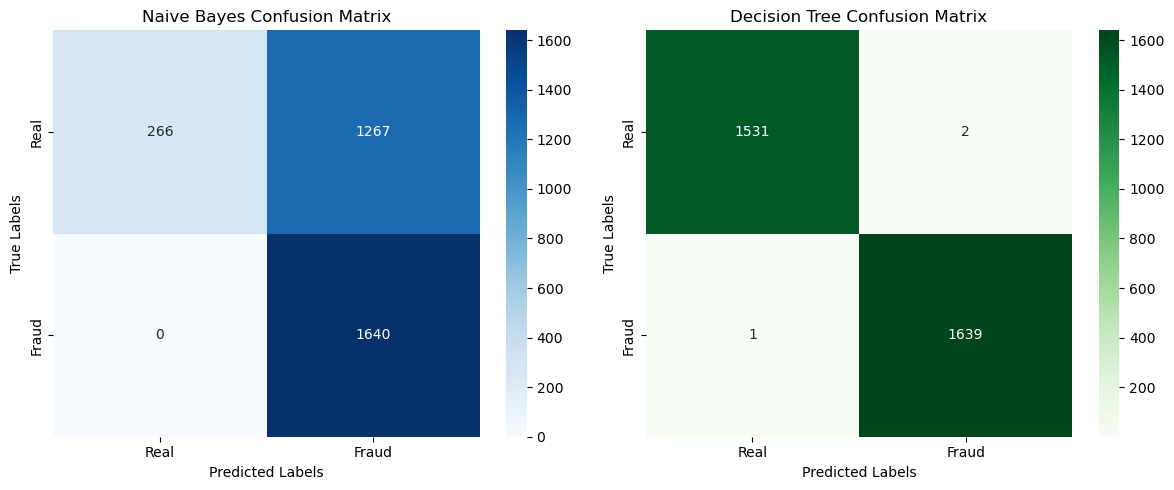

In [11]:
##################################################################
# Create visualization of my Bayes and Decision Tree Matrices    #
##################################################################
fig, ax = plt.subplots(1, 2, figsize=(12, 5))                    # plot the confusion matrices as 1x2
# Gaussian Naive Bayes visual ================================== #
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues', ax=ax[0]) #
ax[0].set_title('Naive Bayes Confusion Matrix')                  #
ax[0].set_xlabel('Predicted Labels')                             #
ax[0].set_ylabel('True Labels')                                  #
ax[0].xaxis.set_ticklabels(['Real', 'Fraud'])                    #
ax[0].yaxis.set_ticklabels(['Real', 'Fraud'])                    #
# Decision Tree visual ========================================= #
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Greens', ax=ax[1])#
ax[1].set_title('Decision Tree Confusion Matrix')                #
ax[1].set_xlabel('Predicted Labels')                             #
ax[1].set_ylabel('True Labels')                                  #
ax[1].xaxis.set_ticklabels(['Real', 'Fraud'])                    #
ax[1].yaxis.set_ticklabels(['Real', 'Fraud'])                    #
# Display ====================================================== #
plt.tight_layout()                                               #
plt.show()                                                       #
##################################################################

## Compare classifiers
So far I have used KNN, Naive Bayes and Decision Tree methods. To this I will add SVM, Random Forest, and Logistic Regression classifiers. Then, we will compare them in several ways.

### Accuracy

SVM Accuracy: 59.06%
Random Forest: 99.97%
Log Reg Accuracy: 59.06%
KNN Accuracy: 99.56%
Naive Bayes Accuracy: 60.07%
Decision Tree Accuracy: 99.91%


/Users/dLoper/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


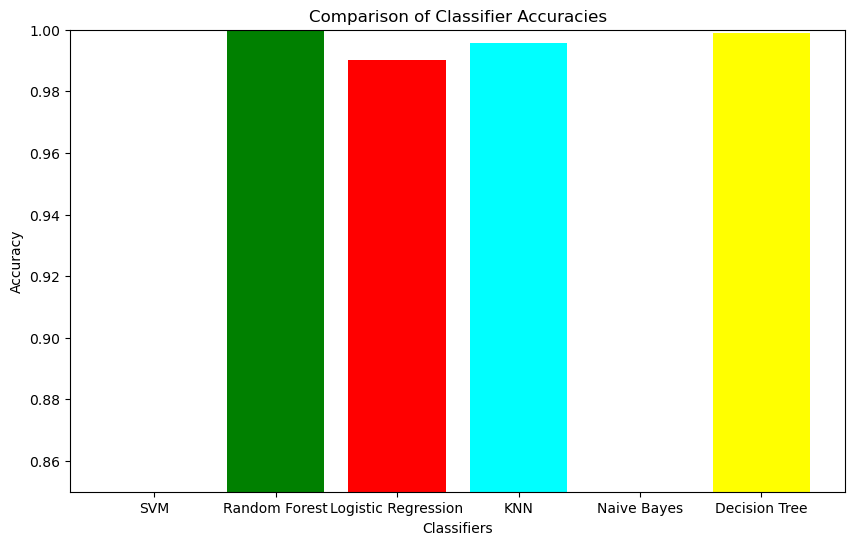

In [12]:
########################################################################################
# Train and show accuracy                                                              #
########################################################################################
# Train Support Vector Machine Classifier ============================================ #
svm = SVC(random_state=1)                                                              # Setup SVM
svm.fit(X_train_scaled, y_train)                                                       # Fit data from training
y_pred_svm = svm.predict(X_test_scaled)                                                # Make predictions
cm_svm = confusion_matrix(y_test, y_pred_svm)                                          # calculate the confusion matrix 
cr_svm = classification_report(y_test, y_pred_svm)                                     # and classification report
accuracy_svm = accuracy_score(y_test, y_pred_svm)                                      # Score accuracy
accuracy_svm_percent = accuracy_svm*  100                                              # Prep Percentage
print('SVM Accuracy: {:.2f}%'.format(accuracy_svm_percent))                            # Output as percentage
# Train with Random Forest Classifier =================================================#
rfc = RandomForestClassifier(random_state=1)                                           # setup random forest classifier
rfc.fit(X_train_scaled, y_train)                                                       # fit data from training
y_pred_rfc = rfc.predict(X_test_scaled)                                                # Make predictions
cm_rfc = confusion_matrix(y_test, y_pred_rfc)                                          # calculate the confusion matrix 
cr_rfc = classification_report(y_test, y_pred_rfc)                                     # and classification report
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)                                      # score accuracy
accuracy_rfc_percent = accuracy_rfc*  100                                              # Prep Percentage
print('Random Forest: {:.2f}%'.format(accuracy_rfc_percent))                           # Output as percentage
# Train with Logistic Regression Classifier ========================================== #
logreg = LogisticRegression(random_state=1)                                            # init logistic regression
logreg.fit(X_train_scaled, y_train)                                                    # fit to training data
y_pred_logreg = logreg.predict(X_test_scaled)                                          # make a prediction
cm_logreg = confusion_matrix(y_test, y_pred_logreg)                                    # calculate the confusion matrix 
cr_logreg = classification_report(y_test, y_pred_logreg)                               # and classification report
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)                                # measure accuracy
accuracy_logreg_percent = accuracy_logreg*  100                                        # Prep Percentage
print('Log Reg Accuracy: {:.2f}%'.format(accuracy_svm_percent))                        # Output as percentage
# Show previoiusly calculates scores ================================================= #
print('KNN Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred)*100))              # Print to console KNN
print('Naive Bayes Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_gnb)*100))  # Print to console Bays
print('Decision Tree Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_dtc)*100))# Print to console DT
########################################################################################

##########################################################################################
# Create visual for accuracy                                                             #
##########################################################################################
accuracy_values = {                                                                      # setup array of values
    'SVM': accuracy_svm,                                                                 # svm
    'Random Forest': accuracy_rfc,                                                       # random forest
    'Logistic Regression': accuracy_logreg,                                              # log reg
    'KNN': accuracy_score(y_test, y_pred),                                               # knn
    'Naive Bayes': accuracy_score(y_test, y_pred_gnb),                                   # bayes
    'Decision Tree': accuracy_score(y_test, y_pred_dtc),                                 # dt
}                                                                                        # finish array
# Name of classifiers and scores ======================================================= #
classifiers = list(accuracy_values.keys())                                               # accuracy of classifier keys
scores = list(accuracy_values.values())                                                  # Accuracy scores
# Creating bar chart =================================================================== #
plt.figure(figsize=(10, 6))                                                              # create chart size
plt.bar(classifiers, scores, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])# use bar and colors
plt.xlabel('Classifiers')                                                                # plotx
plt.ylabel('Accuracy')                                                                   # plot y
plt.title('Comparison of Classifier Accuracies')                                         # give a title
plt.ylim([0.85, 1.00])                                                                   # assume between 85% and 100%
plt.show()                                                                               # Show the data
##########################################################################################

As you can see above, our performance varies between approaches. We can understand this from the confusion matrices of each, listed below.

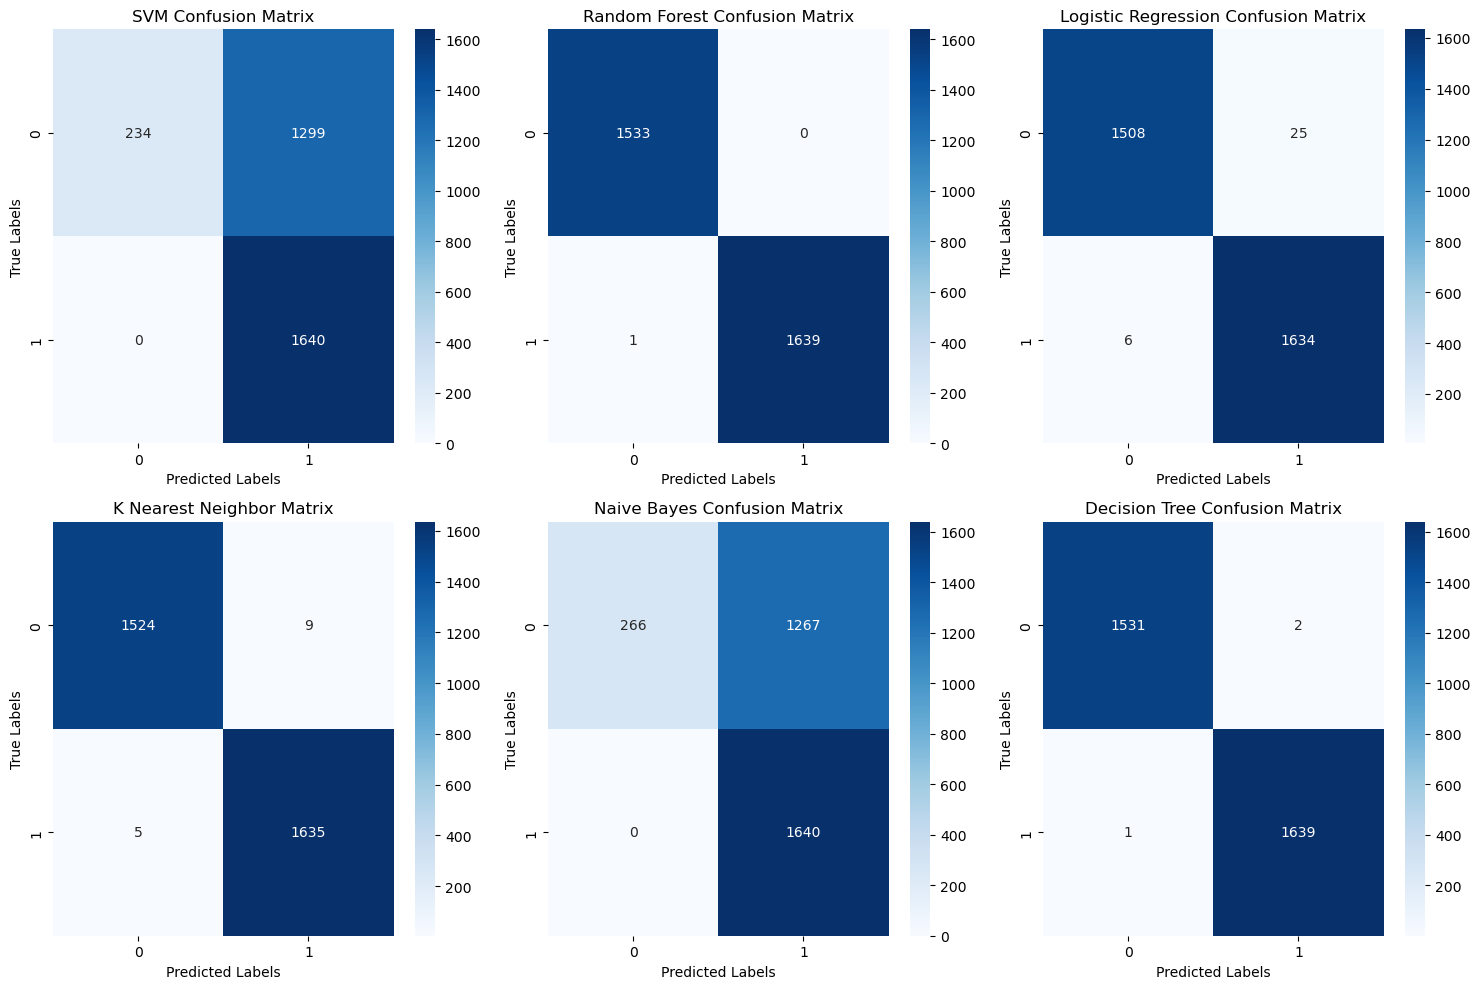

In [13]:
####################################################################
# Comprehensive List of Confusion Matrices                         #
####################################################################
# Array of itles for the confusion matrices ====================== #
cm_titles = [                                                      #
    'SVM Confusion Matrix',                                        #
    'Random Forest Confusion Matrix',                              #
    'Logistic Regression Confusion Matrix',                        #
    'K Nearest Neighbor Matrix',                                   #
    'Naive Bayes Confusion Matrix',                                #
    'Decision Tree Confusion Matrix',                              #
]                                                                  #
# Create elements ================================================ #
cm_list = [cm_svm, cm_rfc, cm_logreg, cm_knn, cm_gnb, cm_dtc]      # my list of confusion matrices
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))       # Plotting 2x3 grid of confusion matrices
axes = axes.flatten()                                              # flatten the axes array for easy iteration
for i, cm in enumerate(cm_list):                                   # iterate through our elements
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i]) # Setup a heatmap for the element
    axes[i].set_title(cm_titles[i])                                # set title
    axes[i].set_xlabel('Predicted Labels')                         # set x labels
    axes[i].set_ylabel('True Labels')                              # set y labels
plt.tight_layout()                                                 # set layout
plt.show()                                                         # display 
####################################################################


### Important features
This analysis can help us understand which features are contributing most to the decision process.

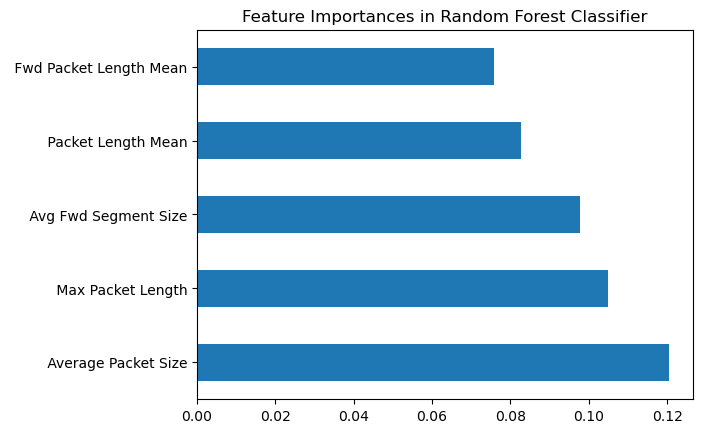

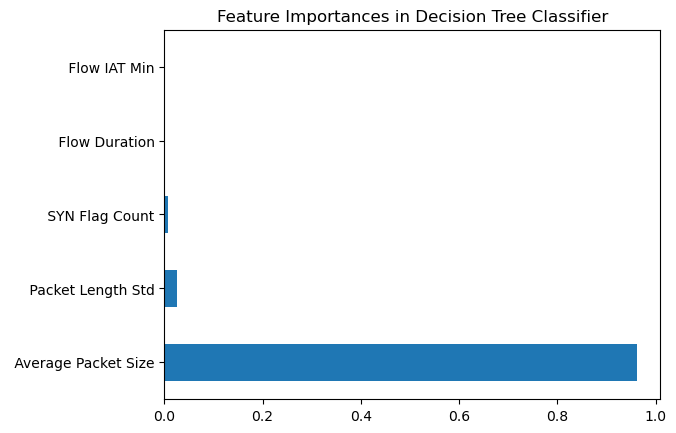

In [14]:
###############################################################################
# Finding our important features                                              #
###############################################################################
# Random Forest Feature Importance ========================================== #
feature_importances_rfc = pd.Series(rfc.feature_importances_, index=X.columns)# Random forest important features
feature_importances_rfc.nlargest(5).plot(kind='barh')                         # Top 5 features
plt.title('Feature Importances in Random Forest Classifier')                  # Set title
plt.show()                                                                    # Show the features
# Decision Tree Feature Importance ========================================== #
feature_importances_dtc = pd.Series(dtc.feature_importances_, index=X.columns)#
feature_importances_dtc.nlargest(5).plot(kind='barh')                         # Top 5 features
plt.title('Feature Importances in Decision Tree Classifier')                  # Set title
plt.show()                                                                    # Show the features
###############################################################################

### Learning Curve
Lastly, I analyze the learning curve of our classifiers. NOTE: This portion is CPU intensive and may take several minutes to run its calculations.

In [15]:
###################################################################################
# Finding our important features                                                  #
###################################################################################
# Create a figure with a 2x2 grid of subplots and define our classifiers ======== #
fig, axes = plt.subplots(2, 3, figsize=(15, 12))                                  # Set up our graphic 2x3
classifiers = [knn, gnb, svm, rfc, logreg, dtc]                                   #
classifier_names = [                                                              # Array of classifier names
    'KNN',                                                                        #    KNN
    'Naive Bayes',                                                                #    Bayes
    'SVM',                                                                        #    SVM
    'Random Forest',                                                              #    Random Forest
    'Logistic Regression',                                                        #    Logistic Regression
    'Decision Tree'                                                               #    Decision Tree
]                                                                                 #
# Loop classifiers to plot learning curves ====================================== #
for ax, clf, name in zip(axes.flatten(), classifiers, classifier_names):          # Start the loop
    train_sizes, train_scores, test_scores = learning_curve(                      # Gather elements
        estimator=clf,                                                            # estimator
        X=X_train_scaled,                                                         # X to our scaled data
        y=y_train,                                                                # y to train
        train_sizes=np.linspace(0.1, 1.0, 10),                                    # training sizes order/mag
        cv=10,                                                                    # cross validation
        n_jobs=-1                                                                 # number of jobs
    )                                                                             # 
    train_mean = np.mean(train_scores, axis=1)                                    # Gather the mean from train
    test_mean = np.mean(test_scores, axis=1)                                      # Gather mean from test
# Start the plat variables ====================================================== #
    ax.plot(train_sizes, train_mean, label='Training score', color='blue')        # Training score plot init
    ax.plot(train_sizes, test_mean, label='Cross-validation score', color='green')# test score plot init
    ax.set_title(f'Learning Curve for {name}')                                    # Set title
    ax.set_xlabel('Training Data Size')                                           # Label x
    ax.set_ylabel('Model score')                                                  # Label y
    ax.legend(loc='best')                                                         # provide a legend
# Adjust layout ================================================================= #
plt.tight_layout()                                                                # Set plot layout to tight
plt.show()                                                                        # Show our plot
###################################################################################

/Users/dLoper/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/dLoper/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-